# Data Exploration

The notebook analyzes the Seattle Terry Stop data set (https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8). This notebook looks at various aspects of the data.

In [70]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [71]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Read The Data

NB: column `Officer ID` contains integer values and string values. This is cleaned up below. At the end we print the first 5 rows.

In [6]:
df = pd.read_csv('../data/Terry_Stops_raw.csv')

In [7]:
df['Officer ID'] = df['Officer ID'].astype('str')
df['Officer ID'] = df['Officer ID'].apply(lambda x : x.strip())

In [8]:
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,...,01:06:00,-,-,-,WEST PCT 3RD W - MARY,N,N,-,-,-
3,-,-1,20150000002815,51725,Field Contact,None,7456,1979,M,White,...,19:27:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-
4,-,-1,20150000002815,51727,Field Contact,None,7456,1979,M,White,...,19:32:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-


# Overview of Columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39406 entries, 0 to 39405
Data columns (total 23 columns):
Subject Age Group           39406 non-null object
Subject ID                  39406 non-null int64
GO / SC Num                 39406 non-null int64
Terry Stop ID               39406 non-null int64
Stop Resolution             39406 non-null object
Weapon Type                 39406 non-null object
Officer ID                  39406 non-null object
Officer YOB                 39406 non-null int64
Officer Gender              39406 non-null object
Officer Race                39406 non-null object
Subject Perceived Race      39406 non-null object
Subject Perceived Gender    39406 non-null object
Reported Date               39406 non-null object
Reported Time               39406 non-null object
Initial Call Type           39406 non-null object
Final Call Type             39406 non-null object
Call Type                   39406 non-null object
Officer Squad               38873 non-null ob

# Analyze Number of Terry Stops Made by Officer

Gert a sense of the distribution the numbewr of Terry Stops per `Officer ID`. The distribution is highly skewed. There are officers that have done significantly more Terry Stops than other officers. This is visualized in the histogram below.

In [20]:
df['Officer ID'].value_counts()

7456    352
7634    328
7758    287
7774    284
7773    278
       ... 
6231      1
7470      1
6070      1
6363      1
6655      1
Name: Officer ID, Length: 1112, dtype: int64

In [21]:
df.loc[df['Officer ID'] == '7774']

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
1387,1 - 17,-1,20150000002337,44916,Field Contact,None,7774,1992,F,White,...,23:11:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,N,Y,-,-,-
1410,1 - 17,-1,20150000005989,103512,Field Contact,None,7774,1992,F,White,...,12:00:00,-,-,-,WEST PCT 1ST W - KQ/DM RELIEF,N,N,-,-,-
1518,1 - 17,-1,20150000334111,85527,Arrest,None,7774,1992,F,White,...,08:00:00,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,911,WEST PCT 1ST W - DAVID/MARY,N,N,West,M,M1
1662,1 - 17,-1,20150000391719,99090,Arrest,None,7774,1992,F,White,...,11:11:00,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,WEST PCT 1ST W - KQ/DM RELIEF,N,N,West,K,K3
1710,1 - 17,-1,20160000044274,126604,Offense Report,None,7774,1992,F,White,...,13:11:00,FIGHT - IP - PHYSICAL (NO WEAPONS),--DISTURBANCE - JUVENILE,ONVIEW,WEST PCT 1ST W - KQ/DM RELIEF,N,N,West,M,M1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38122,56 and Above,-1,20160000353024,197342,Arrest,None,7774,1992,F,White,...,06:59:00,BURN - RECKLESS BURNING,"--ARSON, BOMBS, EXPLO - RECKLESS BURNING",911,WEST PCT 1ST W - KQ/DM RELIEF,N,N,West,M,M3
38154,56 and Above,-1,20160000207233,163613,Arrest,None,7774,1992,F,White,...,10:07:00,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,WEST PCT 1ST W - KQ/DM RELIEF,N,-,West,K,K2
38165,56 and Above,-1,20160000320448,189723,Arrest,None,7774,1992,F,White,...,08:18:00,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--WARRANT SERVICES - MISDEMEANOR,ONVIEW,WEST PCT 1ST W - KQ/DM RELIEF,N,N,West,K,K3
38258,56 and Above,-1,20160000427139,215207,Arrest,None,7774,1992,F,White,...,07:36:00,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,WEST PCT 1ST W - KQ/DM RELIEF,N,N,West,K,K1


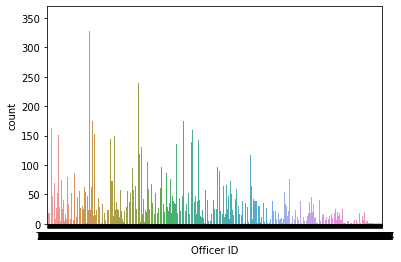

In [22]:
plt.figsize = (12, 10)
sns.countplot(df['Officer ID']);

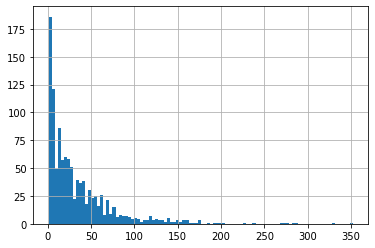

In [23]:
df['Officer ID'].value_counts().hist(bins = 100);

# Top 50 Officers.

Top 50 officers that made the most Terry Stops.

In [28]:
pd.set_option("display.max_rows", 100)
print(df['Officer ID'].value_counts().sort_values(ascending = False)[0:50])

7456    352
7634    328
7758    287
7774    284
7773    278
7765    272
7690    268
7792    239
8359    226
7713    203
5859    200
7691    195
8302    191
8353    187
7661    175
8352    175
7430    173
7459    171
7673    167
8366    164
8315    162
8389    160
8305    159
6953    158
8483    157
7597    157
7722    152
6296    152
7700    151
7727    150
7415    150
8362    147
7808    147
7649    144
7575    142
7724    141
7711    139
7749    139
8405    138
7748    138
7560    136
8509    135
7770    134
8487    133
7638    131
8337    130
8314    129
8436    129
7446    127
7716    126
Name: Officer ID, dtype: int64


In [29]:
df['Officer ID'].value_counts().agg(['mean', 'median','std'])

mean      35.437050
median    22.000000
std       42.175127
Name: Officer ID, dtype: float64

In [30]:
df.loc[df['Officer ID'] == '7456']

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
3,-,-1,20150000002815,51725,Field Contact,None,7456,1979,M,White,...,19:27:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-
4,-,-1,20150000002815,51727,Field Contact,None,7456,1979,M,White,...,19:32:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-
78,-,-1,20150000005460,94183,Field Contact,None,7456,1979,M,White,...,20:06:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-
95,-,-1,20150000005460,94182,Field Contact,None,7456,1979,M,White,...,20:04:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-
123,-,-1,20150000002815,51726,Field Contact,None,7456,1979,M,White,...,19:31:00,-,-,-,NORTH PCT 2ND W - NORA,N,N,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38089,56 and Above,-1,20160000199136,162541,Offense Report,None,7456,1979,M,White,...,17:14:00,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),--PROWLER - TRESPASS,911,NORTH PCT 2ND W - NORA,N,N,North,N,N3
38135,56 and Above,-1,20160000364083,199861,Offense Report,None,7456,1979,M,White,...,19:35:00,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,NORTH PCT 2ND WATCH - NORTH BEATS,N,N,North,N,N3
38582,56 and Above,-1,20180000001259,467762,Field Contact,None,7456,1979,M,White,...,18:09:00,-,-,-,NORTH PCT 2ND WATCH - NORTH BEATS,N,N,-,-,-
39204,56 and Above,7728603896,20190000182686,8236053344,Offense Report,-,7456,1979,M,White,...,14:38:02,RAPE - IP/JO,--RAPE - KNOWN SUSPECT (ACQUAINTANCE),911,NORTH PCT OPS - ACT DAY,N,N,North,N,N2


# Officer and Subject Gender Distribution

The number of female officers making Terry Stops is ~11% (or slightly 1 over 10).

In [32]:
df['Officer Gender'].value_counts()

M    35055
F     4344
N        7
Name: Officer Gender, dtype: int64

In [31]:
4344/(35055+4344)

0.11025660549760147

In [34]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

The gender distribution of subjects is different. 30633 are males, 8189 are females, 583 are unknown, and 1 is a transgender. Around twenty-one percent is female, seventy-eight is male, and unknown is slightly over one per cent. 

In [35]:
df['Subject Perceived Gender'].value_counts()

Male                                                         30633
Female                                                        8189
Unable to Determine                                            326
-                                                              253
Unknown                                                          4
Gender Diverse (gender non-conforming and/or transgender)        1
Name: Subject Perceived Gender, dtype: int64

In [33]:
326+253+4

583

In [36]:
print("female", 8189 / (30633 + 8189 + 583 + 1))
print("female", 30633 / (30633 + 8189 + 583 + 1))
print("unknown", 583 / (30633 + 8189 + 583 + 1))

female 0.2078109932497589
female 0.7773689285895549
unknown 0.014794701314520632


# Race Distribution Officers and Subjects

The cell below shows the distribution of race for subjects. The distribution is fifty per cent white and 50 per cent non-white (of which thirty per cent is black or African American and the remaining twenty per cent consists of other races).

In [36]:
df['Subject Perceived Race'].value_counts()

White                                        19365
Black or African American                    11773
Unknown                                       1958
Hispanic                                      1684
-                                             1251
Asian                                         1210
American Indian or Alaska Native              1185
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       19
Name: Subject Perceived Race, dtype: int64

In [38]:
print("white", 19365/len(df))
print("non-white", (len(df) - 19365)/len(df))
print("black", 11773/len(df))

white 0.4914226259960412
non-white 0.5085773740039587
black 0.29876160990712075


Three out of four officers is white (~77 per cent). One out of five officers is non-white, and for one out of twenty officers we do not know the race.

In [37]:
df['Officer Race'].value_counts()

White                            30483
Hispanic or Latino                2153
Two or More Races                 1889
Asian                             1650
Black or African American         1614
Not Specified                      895
Nat Hawaiian/Oth Pac Islander      410
American Indian/Alaska Native      303
Unknown                              9
Name: Officer Race, dtype: int64

In [39]:
print("white", 30483/len(df))
print("non-white", (len(df)-30483-895-9)/len(df))
print("white", (895+9)/len(df))

white 0.7735624016647211
non-white 0.20349692940161396
white 0.022940668933664924


# Arrests

There are two places where we find arrest data. The `Arrest Flag` (1369 cases) which indicates a physical arrest according to the description for the column. We also find 'Arrest' as a value in column `Stop Resolution` (95768 cases). There is a discrepency between the numbers. We **assume** that the value 'Arrest' in `Stop Resolution` means that the subject was temporarily under arrest, meaning they were not allowed to leave while being stopped. The `Arrest Flag` is whether they were arrested and put into jail. So, for our analysis we focus on the `Arrest Flag` as our prediction target.

In [41]:
df['Stop Resolution'].value_counts()

Field Contact               15193
Offense Report              13758
Arrest                       9578
Referred for Prosecution      727
Citation / Infraction         150
Name: Stop Resolution, dtype: int64

In [42]:
df['Arrest Flag'].value_counts()

N    38037
Y     1369
Name: Arrest Flag, dtype: int64

# Race of Subjects Arrested and Not Arrested

The below compares and contrasts the races of those arrested and those not arrested as a result of a Terry Stop. Of those arrested, slightly over 48 % is white, 40 % is non-white, and 12% is unknown. Of the non-white the majority is black and accounts for 32 % (or in other words 82% of the non-white is Black or African American).

"The racial composition of the city [Seattle] in 2016 was 65.7% white, 14.1% Asian, 7.0% Black, 0.4% Native American, 0.9% Pacific Islander, 2.3% from other races, and 5.6% from two or more races. 6.6% of the population is Hispanic or Latino of any race." (https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&cad=rja&uact=8&ved=2ahUKEwjW3-6vvJfnAhXrmq0KHf6RBHoQFjACegQIDhAG&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FDemographics_of_Seattle&usg=AOvVaw2NmVbsCa82EBD4id7eATSF)

Although it is unknown what the per centage for Blacks or African Americans in Seattle is in 2020, we can conclude that the Blacks or African Americans seem to be over-represented in the arrests due to Terry Stops (4 - 5 times). This may be due to many factors (e.g. poverty, education, employment, etc), and we lack the data to draw any further conclusions from the data.

In [42]:
df[df['Arrest Flag'] == 'Y']['Subject Perceived Race'].value_counts()

White                                        666
Black or African American                    443
Unknown                                      101
-                                             62
Asian                                         57
American Indian or Alaska Native              36
Native Hawaiian or Other Pacific Islander      4
Name: Subject Perceived Race, dtype: int64

In [46]:
print("white", 666/sum(df['Arrest Flag'] == 'Y'))
print("non-white", (443+57+36+4)/sum(df['Arrest Flag'] == 'Y'))
print("black", (443)/sum(df['Arrest Flag'] == 'Y'))
print("unknown", (101+62)/sum(df['Arrest Flag'] == 'Y'))

white 0.4864864864864865
non-white 0.3944485025566107
black 0.32359386413440466
unknown 0.11906501095690285


In terms of race for Terry Stops that resulted not in an arrest, the distribution is 49 % white, 43 % is non-white (of which 30 % is black or 70% of non-whites), and 8 % is unknown.

In [58]:
df[df['Arrest Flag'] == 'N']['Subject Perceived Race'].value_counts()

White                                        18699
Black or African American                    11330
Unknown                                       1857
Hispanic                                      1684
-                                             1189
Asian                                         1153
American Indian or Alaska Native              1149
Multi-Racial                                   809
Other                                          152
Native Hawaiian or Other Pacific Islander       15
Name: Subject Perceived Race, dtype: int64

In [59]:
print("white", 18699/sum(df['Arrest Flag'] == 'N'))
print("non-white", (11330+1684+1153+1149+809+152+15)/sum(df['Arrest Flag'] == 'N'))
print("black", (11330)/sum(df['Arrest Flag'] == 'N'))
print("unknown", (1857+1189)/sum(df['Arrest Flag'] == 'N'))

white 0.4916002839340642
non-white 0.42831979388490155
black 0.29786786549938216
unknown 0.08007992218103425


# Arrest Ratios of Subjects

The cell below uses the above information to determine whether the different races have an equal probablity of being arrested once stopped using a Terry Stop. You can see that the arrest rates for white and non-white looks about equal. However, the arrest ratio stands out as significantly higher. That seems to imply that the other non-white races are arrest at significantly lower rates. Note that we do not have enough data or information to determine why the Black or African American community may be arrested at a higher rate.

In [60]:
print("arrest ratio white", 666/(18699+666))
print("arrest ratio black", 443/(1189+443))
print("arrest ratio non-white", (443+57+36+4) / ((11330+1684+1153+1149+809+152+15)+ (443+57+36+4)) )

arrest ratio white 0.03439194422927963
arrest ratio black 0.27144607843137253
arrest ratio non-white 0.032081749049429654


# Distribution of Arrests

There is no location data of where the Terry Stops took place. The data has a Precinct, Sector, and Beat column of the location where the dispatch was from. For about one fourth no data is available. The majority of the Terry Stops for which we do have dispatch location information seems to be in the North or the West of the city of Seatle.

In [44]:
df[df['Arrest Flag'] == 'N']['Precinct'].value_counts()

-            9289
North        8626
West         7716
East         5052
South        4499
Southwest    2320
SouthWest     309
Unknown       200
OOJ            15
FK ERROR       11
Name: Precinct, dtype: int64

# Top Arresting Officers

The below cell identifies the officers that have an arrest ratio of over 20 percent and more than ten Terry Stops. The 20 % arrest rate is chosen to identify outliers, as the average arrest rate is around 3 % (except for Blacks or African Americans). Ten Terry Stops is used to avoid picking up high arrest rates due to small Terry Stops numbers. Note that the average number of Terry Stops per officer is around twenty (with a standard deviation of 42). 

In [64]:
arresting_officers = []
for officer in df['Officer ID'].unique():
    subset = df['Arrest Flag'].loc[df['Officer ID'] == officer]
    arrest_ratio = sum(subset == 'Y') / len(subset)
    if arrest_ratio > 0.2 and len(subset) > 10:
        arresting_officers.append(officer)
        print(officer, arrest_ratio, len(subset))
len(arresting_officers)

8620 0.20689655172413793 29
8567 0.21739130434782608 23
8608 0.5217391304347826 23
8656 0.36363636363636365 11
8669 0.4166666666666667 12
8675 0.3023255813953488 43
8636 0.25 20
8679 0.3125 16
8633 0.23809523809523808 21
8577 0.40350877192982454 57
8637 0.3 20
8652 0.24193548387096775 62
8617 0.3055555555555556 36
8673 0.5454545454545454 11
8601 0.2857142857142857 14
8639 0.32142857142857145 28
8666 0.4230769230769231 26
8576 0.25 24
8632 0.3939393939393939 33
8615 0.2222222222222222 36
8644 0.6 25
8640 0.4166666666666667 12
8648 0.35714285714285715 14
8680 0.5555555555555556 18
8643 0.47619047619047616 21
8689 0.25 12
7390 0.25 16


27

The cell below looks at the race of the officer. Twelve out of twenty-seven are non-white (44%), and fifteen out of twenty-seven is white (46%). This implies that non-whites seem to be using Terry Stops as a proportion of the total officer population. Note that only 14 % of the top arresting officers is Black or African American.

The cell also looks to see what the race is of the subjects that the officers are arresting. There does not seem to be a clear bias. What does stand out is that these officers seem to be arresting black people in higher numbers than their overall proportion of the population in Seattle.

In [78]:
for officer in arresting_officers:
    subset = df[df['Officer ID'] == officer]
    print(officer, "\nrace officer:", subset['Officer Race'].unique(), 
          "\nrace subject:\n", subset['Subject Perceived Race'].value_counts(), "\n======\n")

8620 
race officer: ['White'] 
race subject:
 Black or African American           13
White                               10
-                                    2
Unknown                              1
American Indian or Alaska Native     1
Asian                                1
Hispanic                             1
Name: Subject Perceived Race, dtype: int64 

8567 
race officer: ['White'] 
race subject:
 Black or African American           10
White                                9
Hispanic                             2
Unknown                              1
American Indian or Alaska Native     1
Name: Subject Perceived Race, dtype: int64 

8608 
race officer: ['Hispanic or Latino'] 
race subject:
 White                        13
Black or African American     6
-                             2
Unknown                       1
Asian                         1
Name: Subject Perceived Race, dtype: int64 

8656 
race officer: ['White'] 
race subject:
 Black or African American    4
-        

# Create a Seperate Arresting Summary Dataframe

To help future analysis, summary data from the main datafrmae is created in the cell below.

In [82]:
fields = ['Officer_ID', 'Officer_Race', 'Officer_Gender',
          'Total_Stops', 'White_Stops', 'Non-White_Stops', 
          'Total_Arrests', 'White_Arrests', 'Non-White_Arrests',
          'Total_Arrest_Ratio', 'White_Arrest_Ratio', 'Non-White_Arrest_Ratio']
df_arrest = pd.DataFrame(columns = fields)
for officer in df['Officer ID'].unique():
    subset = df.loc[df['Officer ID'] == officer]
    arrest_ratio = sum(subset['Arrest Flag'] == 'Y') / len(subset)
    white_stops = len(subset.loc[subset['Subject Perceived Race'] == 'White'])
    white_arrests = len(subset.loc[(subset['Subject Perceived Race'] == 'White') &
                              (subset['Arrest Flag'] == 'Y')])
    non_white_stops = len(subset.loc[subset['Subject Perceived Race'] != 'White'])
    non_white_arrests = len(subset.loc[(subset['Subject Perceived Race'] != 'White') &
                                  (subset['Arrest Flag'] == 'Y')])
    if white_stops != 0:
        white_arrest_ratio = white_arrests / white_stops
    else:
        white_arrest_ratio = 0
    if non_white_stops != 0:
        non_white_arrest_ratio = non_white_arrests / non_white_stops
    else:
        non_white_arrest_ratio = 0
    temp_df = {'Officer_ID' : [officer],
               'Officer_Race' : subset['Officer Race'].unique(),
               'Officer_Gender' : subset['Officer Gender'].unique(),
               'Total_Stops' : [len(subset)],
               'White_Stops' : [white_stops],
               'Non-White_Stops' : [non_white_stops],
               'Total_Arrests' : [sum(subset['Arrest Flag'] == 'Y')],
               'White_Arrests' : [white_arrests],
               'Non-White_Arrests' : [non_white_arrests],
               'Total_Arrest_Ratio': [arrest_ratio],
               'White_Arrest_Ratio' : [white_arrest_ratio],
               'Non-White_Arrest_Ratio' : [non_white_arrest_ratio]}
    temp_df = pd.DataFrame.from_dict(temp_df)
    df_arrest = pd.concat([df_arrest, temp_df])
df_arrest.head()

,Officer_ID,Officer_Race,Officer_Gender,Total_Stops,White_Stops,Non-White_Stops,Total_Arrests,White_Arrests,Non-White_Arrests,Total_Arrest_Ratio,White_Arrest_Ratio,Non-White_Arrest_Ratio
0,7500,Black or African American,M,40,9,31,0,0,0,0.000000,0.000000,0.000000
0,7539,White,M,77,49,28,6,2,4,0.077922,0.040816,0.142857
0,7591,Hispanic or Latino,M,79,36,43,1,1,0,0.012658,0.027778,0.000000
0,7456,White,M,352,191,161,11,5,6,0.031250,0.026178,0.037267
0,5966,White,M,19,5,14,0,0,0,0.000000,0.000000,0.000000


In [83]:
df_arrest.sample(10)

,Officer_ID,Officer_Race,Officer_Gender,Total_Stops,White_Stops,Non-White_Stops,Total_Arrests,White_Arrests,Non-White_Arrests,Total_Arrest_Ratio,White_Arrest_Ratio,Non-White_Arrest_Ratio
0,6845,White,M,1,1,0,0,0,0,0.000000,0.000000,0.000000
0,8623,White,M,25,9,16,5,2,3,0.200000,0.222222,0.187500
0,7699,White,F,70,37,33,0,0,0,0.000000,0.000000,0.000000
0,6761,Hispanic or Latino,M,39,26,13,2,0,2,0.051282,0.000000,0.153846
0,8595,White,M,29,11,18,5,2,3,0.172414,0.181818,0.166667
0,8589,Hispanic or Latino,M,12,9,3,0,0,0,0.000000,0.000000,0.000000
0,6984,White,M,11,1,10,0,0,0,0.000000,0.000000,0.000000
0,7693,White,F,71,39,32,0,0,0,0.000000,0.000000,0.000000
0,7719,White,M,12,8,4,0,0,0,0.000000,0.000000,0.000000
0,5709,Black or African American,M,12,10,2,0,0,0,0.000000,0.000000,0.000000


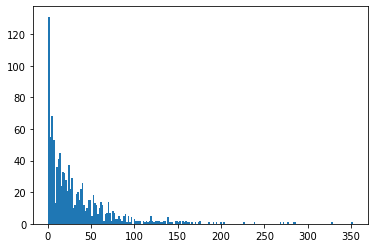

In [84]:
plt.hist(df_arrest['Total_Stops'], bins = 200);

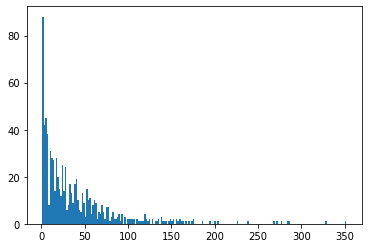

In [85]:
plt.hist(df_arrest[df_arrest['Officer_Race'] == 'White']['Total_Stops'], bins = 200);

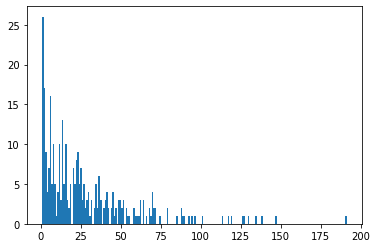

In [86]:
plt.hist(df_arrest[df_arrest['Officer_Race'] != 'White']['Total_Stops'], bins = 200);

In [87]:
top_50 = df_arrest.sort_values(by = 'Total_Stops', ascending = False)[:50]
top_50

,Officer_ID,Officer_Race,Officer_Gender,Total_Stops,White_Stops,Non-White_Stops,Total_Arrests,White_Arrests,Non-White_Arrests,Total_Arrest_Ratio,White_Arrest_Ratio,Non-White_Arrest_Ratio
0,7456,White,M,352,191,161,11,5,6,0.031250,0.026178,0.037267
0,7634,White,M,328,206,122,6,4,2,0.018293,0.019417,0.016393
0,7758,White,M,287,171,116,16,8,8,0.055749,0.046784,0.068966
0,7774,White,F,284,152,132,0,0,0,0.000000,0.000000,0.000000
0,7773,White,M,278,180,98,13,12,1,0.046763,0.066667,0.010204
0,7765,White,M,272,145,127,11,6,5,0.040441,0.041379,0.039370
0,7690,White,M,268,146,122,13,9,4,0.048507,0.061644,0.032787
0,7792,White,M,239,86,153,9,7,2,0.037657,0.081395,0.013072
0,8359,White,M,226,95,131,0,0,0,0.000000,0.000000,0.000000
0,7713,White,M,203,126,77,4,2,2,0.019704,0.015873,0.025974


In [179]:
df_arrest.groupby('Officer_Race')['Total_Arrests'].agg(['sum', 'mean', 'std'])

,sum,mean,std
Officer_Race,,,
American Indian/Alaska Native,1,0.076923,0.277350
Asian,54,0.915254,1.694699
Black or African American,54,0.701299,1.386637
Hispanic or Latino,125,1.785714,3.309595
Nat Hawaiian/Oth Pac Islander,12,1.000000,1.537412
Not Specified,5,0.178571,0.475595
Two or More Races,95,1.792453,3.559162
Unknown,0,0.000000,0.000000
White,1023,1.283563,2.851852


In [172]:
df_arrest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 0 to 0
Data columns (total 12 columns):
Officer_ID                1112 non-null object
Officer_Race              1112 non-null object
Officer_Gender            1112 non-null object
Total_Stops               1112 non-null object
White_Stops               1112 non-null object
Non-White_Stops           1112 non-null object
Total_Arrests             1112 non-null object
White_Arrests             1112 non-null object
Non-White_Arrests         1112 non-null object
Total_Arrest_Ratio        1112 non-null float64
White_Arrest_Ratio        1112 non-null float64
Non-White_Arrest_Ratio    1112 non-null float64
dtypes: float64(3), object(9)
memory usage: 152.9+ KB


In [175]:
change_list = [c for c in df_arrest.columns if 'Officer' not in c and 'Ratio' not in c]
change_list

['Total_Stops',
 'White_Stops',
 'Non-White_Stops',
 'Total_Arrests',
 'White_Arrests',
 'Non-White_Arrests']

In [176]:
for col in change_list:
    df_arrest[col] = df_arrest[col].astype('int')

In [178]:
df_arrest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112 entries, 0 to 0
Data columns (total 12 columns):
Officer_ID                1112 non-null object
Officer_Race              1112 non-null object
Officer_Gender            1112 non-null object
Total_Stops               1112 non-null int64
White_Stops               1112 non-null int64
Non-White_Stops           1112 non-null int64
Total_Arrests             1112 non-null int64
White_Arrests             1112 non-null int64
Non-White_Arrests         1112 non-null int64
Total_Arrest_Ratio        1112 non-null float64
White_Arrest_Ratio        1112 non-null float64
Non-White_Arrest_Ratio    1112 non-null float64
dtypes: float64(3), int64(6), object(3)
memory usage: 152.9+ KB


In [180]:
df_arrest.groupby('Officer_Race')['Total_Stops'].agg(['sum', 'mean', 'std'])

,sum,mean,std
Officer_Race,,,
American Indian/Alaska Native,303,23.307692,25.885596
Asian,1650,27.966102,29.858266
Black or African American,1614,20.961039,20.550606
Hispanic or Latino,2153,30.757143,29.548504
Nat Hawaiian/Oth Pac Islander,410,34.166667,32.904361
Not Specified,895,31.964286,35.947989
Two or More Races,1889,35.641509,36.493463
Unknown,9,3.000000,1.732051
White,30483,38.247177,45.877107


In [183]:
top_50.groupby('Officer_Race')['Total_Arrests'].agg(['sum', 'mean', 'std'])

,sum,mean,std
Officer_Race,,,
Asian,6,3.000000,4.242641
Not Specified,1,0.500000,0.707107
Two or More Races,13,4.333333,7.505553
White,230,5.348837,5.739934


In [184]:
df_arrest.groupby('Officer_Race')['Total_Arrests'].agg(['sum', 'mean', 'std'])

,sum,mean,std
Officer_Race,,,
American Indian/Alaska Native,1,0.076923,0.277350
Asian,54,0.915254,1.694699
Black or African American,54,0.701299,1.386637
Hispanic or Latino,125,1.785714,3.309595
Nat Hawaiian/Oth Pac Islander,12,1.000000,1.537412
Not Specified,5,0.178571,0.475595
Two or More Races,95,1.792453,3.559162
Unknown,0,0.000000,0.000000
White,1023,1.283563,2.851852


In [185]:
df.groupby('Precinct')['Arrest Flag'].count()

Precinct
-            9388
East         5277
FK ERROR       11
North        8873
OOJ            15
South        4686
SouthWest     431
Southwest    2320
Unknown       200
West         8205
Name: Arrest Flag, dtype: int64

In [89]:
top_50_ids = top_50['Officer_ID'].to_list()

In [90]:
# top_50_ids

In [91]:
for officer in top_50_ids:
    subset = df[['Precinct', 'Sector', 'Beat']].loc[df['Officer ID'] == officer]
    print(subset.groupby(['Precinct', 'Sector', 'Beat']).count())

Empty DataFrame
Columns: []
Index: [(-, -, -), (East, E     , E1    ), (East, G     , G2    ), (North, B, B2), (North, B, B3), (North, B     , B1    ), (North, B     , B2    ), (North, B     , B3    ), (North, J, J1), (North, J, J3), (North, J     , J1    ), (North, J     , J2    ), (North, J     , J3    ), (North, L, L2), (North, L     , L1    ), (North, L     , L2    ), (North, N, N1), (North, N, N2), (North, N, N3), (North, N     , N1    ), (North, N     , N2    ), (North, N     , N3    ), (North, U, U1), (North, U, U2), (North, U     , U1    ), (North, U     , U2    ), (North, U     , U3    ), (South, O     , O1    ), (South, R     , R2    ), (Southwest, F     , F2    ), (Southwest, W     , W2    ), (Southwest, W     , W3    ), (West, D, D2), (West, D     , D1    ), (West, D     , D2    ), (West, M     , M1    ), (West, Q     , Q1    ), (West, Q     , Q2    ), (West, Q     , Q3    )]
Empty DataFrame
Columns: []
Index: [(-, -, -), (East, C, C3), (East, C     , C1    ), (East, C     

Index: [(-, -, -), (East, E     , E1    ), (East, E     , E2    ), (North, B, B2), (North, B     , B1    ), (North, B     , B2    ), (North, J, J3), (North, J     , J3    ), (North, L, L2), (North, L     , L1    ), (North, L     , L2    ), (North, N, N3), (North, N     , N2    ), (North, N     , N3    ), (North, U, U1), (North, U, U2), (North, U     , U2    ), (South, O     , O3    ), (South, S     , S3    ), (Unknown, -, -), (West, D     , D3    ), (West, K, K3), (West, K     , K1    ), (West, M     , M2    ), (West, M     , M3    ), (West, Q     , Q3    )]
Empty DataFrame
Columns: []
Index: [(-, -, -), (East, E     , E1    ), (East, G     , G1    ), (North, B     , B2    ), (Southwest, F     , F3    ), (West, D, D1), (West, D, D2), (West, D     , D1    ), (West, D     , D2    ), (West, D     , D3    ), (West, K     , K1    ), (West, K     , K2    ), (West, K     , K3    ), (West, M     , M1    ), (West, M     , M2    ), (West, M     , M3    ), (West, Q     , Q2    ), (West, Q     , Q

# Year of Birth Officer

The below looks into the year the officer was born. The year 1900 looks off, and we delte them as they seem to be just training entries.

In [207]:
df.groupby('Officer YOB')['Officer ID'].count()

Officer YOB
1900       9
1946       2
1948      11
1949       5
1951       1
1952       9
1953      31
1954      43
1955      21
1956      16
1957      41
1958     218
1959     173
1960     154
1961     197
1962     441
1963     223
1964     386
1965     396
1966     214
1967     661
1968     566
1969     493
1970     538
1971    1150
1972     384
1973     846
1974     515
1975     463
1976     879
1977     927
1978    1003
1979    1319
1980     745
1981    1238
1982    1701
1983    1560
1984    2488
1985    2291
1986    2787
1987    2484
1988    1760
1989    1654
1990    1778
1991    2217
1992    1943
1993     969
1994     521
1995     682
1996     150
1997     103
Name: Officer ID, dtype: int64

In [208]:
df['Reported Date'].agg(['min', 'max'])

min    2015-03-15T00:00:00
max    2020-01-20T00:00:00
Name: Reported Date, dtype: object

In [209]:
df.loc[df['Officer YOB'] == 1900]

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
2915,1 - 17,7728642974,20190000174898,8221922106,Field Contact,-,-,1900,N,Unknown,...,19:10:01,-,-,-,NaN,N,N,East,E,E2
3291,18 - 25,-1,20150000002331,44896,Field Contact,None,-9,1900,N,Unknown,...,20:50:00,-,-,-,NaN,N,N,-,-,-
6786,18 - 25,-1,20170000002266,272878,Field Contact,None,-9,1900,N,Unknown,...,07:43:00,-,-,-,NaN,N,N,-,-,-
8772,18 - 25,-1,20180000046273,387190,Arrest,None,-9,1900,N,Unknown,...,04:11:00,-,-,-,NaN,N,N,West,Q,Q1
10603,18 - 25,7725490757,20190000328367,10047108776,Field Contact,-,-,1900,N,Unknown,...,03:12:17,-,-,-,NaN,N,N,West,K,K1
18792,26 - 35,-1,20180000001777,421839,Field Contact,None,8579,1900,M,Unknown,...,03:05:00,-,-,-,TRAINING - FIELD TRAINING SQUAD,N,N,-,-,-
25666,36 - 45,-1,20160000000012,114952,Field Contact,None,-9,1900,N,Unknown,...,07:05:00,-,-,-,NaN,N,N,North,N,N3
26069,36 - 45,-1,20160000004004,193190,Field Contact,None,-9,1900,N,Unknown,...,21:33:00,-,-,-,NaN,N,N,-,-,-
38859,56 and Above,-1,20180000252995,440407,Offense Report,None,8579,1900,M,Unknown,...,14:37:00,UNKNOWN - ANI/ALI - WRLS PHNS (INCL OPEN LINE),--DISTURBANCE - OTHER,"TELEPHONE OTHER, NOT 911",TRAINING - FIELD TRAINING SQUAD,N,Y,North,B,B2


In [215]:
df.drop(df.loc[df['Officer YOB'] == 1900].index, inplace = True)

In [216]:
df.shape

(39397, 23)

# Checking for null values.

In [217]:
df.isna().sum()

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               526
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64

# Checking values of "Officer Squad" column.

In [218]:
df['Officer Squad'].value_counts()

TRAINING - FIELD TRAINING SQUAD                        4138
WEST PCT 1ST W - DAVID/MARY                            1252
NORTH PCT 2ND WATCH - NORTH BEATS                       878
WEST PCT 2ND W - D/M RELIEF                             819
SOUTHWEST PCT 2ND W - FRANK                             807
                                                       ... 
SOUTHWEST PCT OPS - BURG/THEFT                            1
COMMUNITY OUTREACH UNIT                                   1
TRAF - MOTORCYCLE UNIT - T2 SQUAD                         1
COMMUNITY OUTREACH - YOUTH VIOLENCE -SCHOOLS DETAIL       1
RECORDS - DAY SHIFT                                       1
Name: Officer Squad, Length: 155, dtype: int64